In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### read the given csv file

In [3]:
file_path = "./../../data/task100k.csv"
df = pd.read_csv(file_path, encoding='utf8')

In [4]:
df.head()

,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            99999 non-null  object 
 1   name          99999 non-null  object 
 2   artists       99999 non-null  object 
 3   duration_ms   99999 non-null  int64  
 4   popularity    99999 non-null  int64  
 5   release_date  99999 non-null  object 
 6   tempo         99999 non-null  float64
 7   key           99999 non-null  int64  
 8   liveness      99999 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [6]:
df.shape

(99999, 9)

#### Label the track that is actual live by the statement in the song title

0: song title does **not** indicate "live" music <br/>
1: song title indicate "live" music

In [7]:
def is_title_contain_live(x): #df.name
    tname_ = x.lower().replace('/', ' - ').replace(';', ' - ').replace(',', ' ').replace('- live', '-live').replace('live at', '-live at')
    

    if any(kword in tname_.split(' ') for kword in ['-live', '(live', '[live', 'live version', '--live']):
        return 1
    else : 
        return 0

check the function works

In [ ]:
song_not_live = []
for song in df.name.tolist():
    re_song = song.lower().replace('/', ' - ').replace(';', ' - ').replace(',', ' ').replace('- live', '-live').replace('live at', '-live at')
    
    
    words = [word for word in re_song.split(' ') ]
    
            
    if not any(kword in words for kword in ['-live',  '(live', '[live', 'live version', '--live']) \
    and any(kword in words for kword in ['live', 'Live']):
        
        song_not_live.append(song)
        print(song)
    
#print(song_not_live)

In [8]:
df["is_title_contain_live"] = df.name.apply(is_title_contain_live)

In [9]:
df.head()

,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness,is_title_contain_live
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665,0
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160,0
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101,0
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381,0
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229,0


#### Label the track with a high value in liveness label

0: value below set threshold (means lower liveness) <br/>
1: value above set threshold (means higher liveness)

In [10]:
def label_high_value_in_liveness(x, threshold):
    if x >= threshold:
        return 1
    else : 
        return 0

In [11]:
threshold = 0.8
df["high_liveness"] = df.liveness.apply(label_high_value_in_liveness, args=(threshold,))

In [12]:
df.head()

,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness,is_title_contain_live,high_liveness
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665,0,0
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160,0,0
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101,0,0
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381,0,0
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229,0,0


#### Label the incorrect liveness label

0: correct liveness <br/>
1: incorrect liveness 

In [13]:
def incorrect_liveness(x):
    if x["is_title_contain_live"] == x["high_liveness"] : # correct liveness
        return 0
    elif x["is_title_contain_live"] != x["high_liveness"] : # incorrect liveness
        return 1

In [14]:
df["incorrect_liveness"] = df.apply(incorrect_liveness, axis=1)

#### take a look at the data distribution

/Users/athenayun/.virtualenvs/py3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


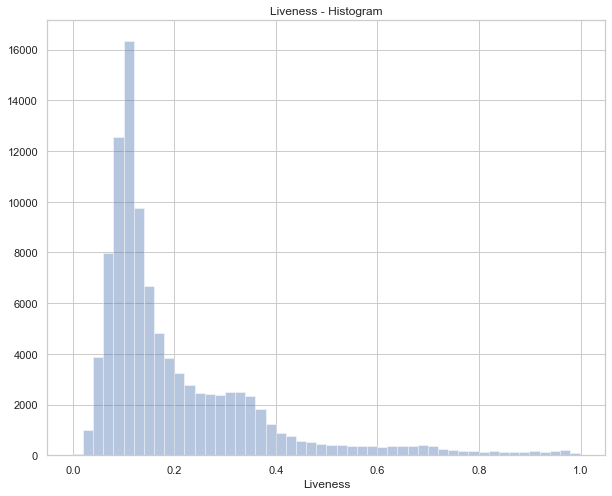

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)


sns_plot = sns.distplot(df["liveness"], kde=False, )
sns_plot.set(xlabel='Liveness' , title='Liveness - Histogram')

fig = sns_plot.get_figure()
fig.savefig('./liveness_hist.png')

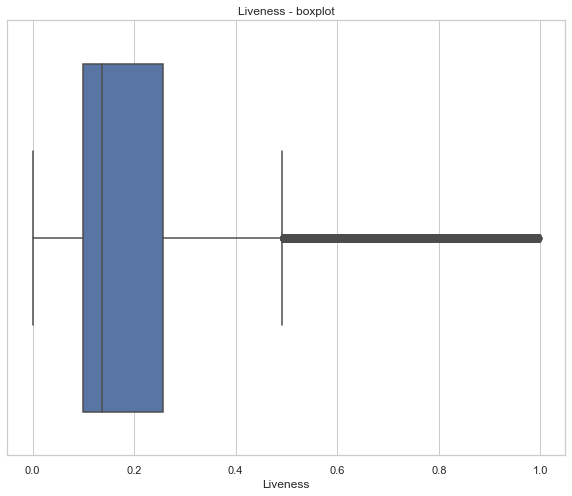

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)


sns_plot = sns.boxplot(x=df["liveness"])
sns_plot.set(xlabel='Liveness' , title='Liveness - boxplot')

fig = sns_plot.get_figure()
fig.savefig('./liveness_boxplot.png')

####  try on Decision Tree

In [17]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'popularity', 'release_date',
       'tempo', 'key', 'liveness', 'is_title_contain_live', 'high_liveness',
       'incorrect_liveness'],
      dtype='object')

In [18]:
features = [ 'duration_ms', 'popularity', 
       'tempo', 'key', 'liveness', 'is_title_contain_live', 'high_liveness',
       'incorrect_liveness']
featured_df = df[features]

In [19]:
featured_df.head()

,duration_ms,popularity,tempo,key,liveness,is_title_contain_live,high_liveness,incorrect_liveness
0,831667,4,80.954,10,0.665,0,0,0
1,180533,5,60.936,7,0.160,0,0,0
2,500062,5,110.339,3,0.101,0,0,0
3,210000,3,100.109,5,0.381,0,0,0
4,166693,2,101.665,3,0.229,0,0,0


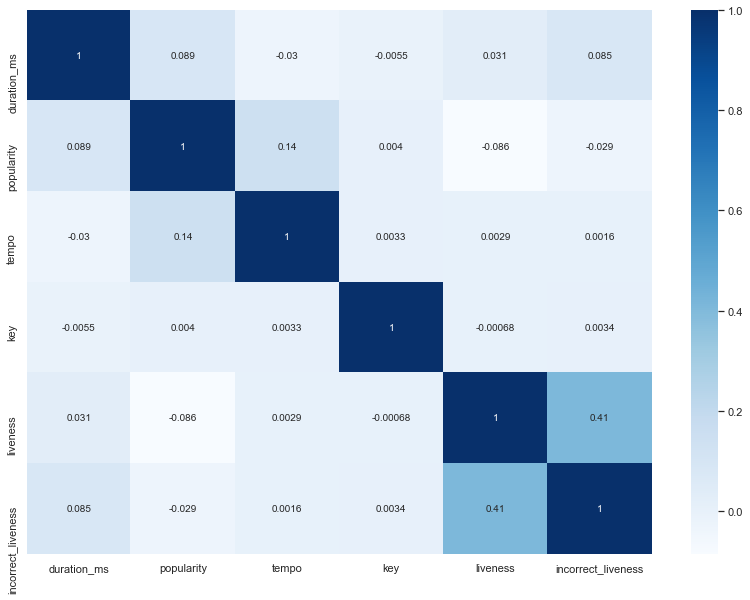

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)

#plt.figure(figsize=(14, 10))
# annot數值標示

features = [ 'duration_ms', 'popularity', 
       'tempo', 'key', 'liveness',
       'incorrect_liveness']
featured_df_gr = df[features]


sns.heatmap(featured_df_gr.astype('float').corr(), cmap='Blues',annot=True) #cmap='YlGn' 'YlGnBu' 'Blues'
fig.savefig('./heatmap_origin.png')

In [21]:
# seperate the data in X, Y
y_df = featured_df['incorrect_liveness']
x_df = featured_df.drop(['incorrect_liveness', 'high_liveness', 'is_title_contain_live'], axis=1)



apply scaler 

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_df_MM = MinMaxScaler().fit_transform(x_df)

#df[['x','z']] = mms.fit_transform(df[['x','z']])

In [23]:
def prediction_outcome(y_test, pre):
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    from sklearn.metrics import confusion_matrix
    
    print('Probability of accurate prediction 預測成功的機率:', accuracy_score(pre, y_test))

    y = y_test
    scores = pre
    print('precision: %0.2f, recall: %0.2f' % (
            precision_score(y, scores, average='macro'),
            recall_score(y, scores, average='macro')
    ))

    # confusion matrix
    col = pd.MultiIndex.from_product([['Prediction'],
                                     ['correct_live','incorrect_live']])
    idx = pd.MultiIndex.from_product([['Actual'],
                                     ['correct_live','incorrect_live']])
    
    cm_df = pd.DataFrame(confusion_matrix(y_test, pre), columns=col, index=idx)
    return cm_df

In [24]:
from sklearn.model_selection import train_test_split
# train_test_split -> (x_train 90%, x_test 10%, y_train 90%, y_test 10%)
x_train, x_test, y_train, y_test = train_test_split(x_df_MM, y_df, test_size=0.1)

#### Due to the imbalance in y label (0 : 1463,  1: 98536) , there is a need to give a weight 

In [25]:
label_1_num = featured_df[featured_df.incorrect_liveness ==1].shape[0] 
label_0_num = featured_df[featured_df.incorrect_liveness ==0].shape[0] 
total_num = featured_df.shape[0]

weight_0 = label_1_num/total_num
weight_1 = label_0_num/total_num
print(f'0: {weight_0}  1:{weight_1}')

0: 0.01953019530195302  1:0.980469804698047


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, class_weight={0:weight_0, 1:weight_1}, criterion="entropy")
clf.fit(x_train, y_train)
pre = clf.predict(x_test)
prediction_outcome(y_test, pre)

Probability of accurate prediction 預測成功的機率: 0.904
precision: 0.57, recall: 0.87


Prediction               
                      correct_live incorrect_live
Actual correct_live           8873            927
       incorrect_live           33            167

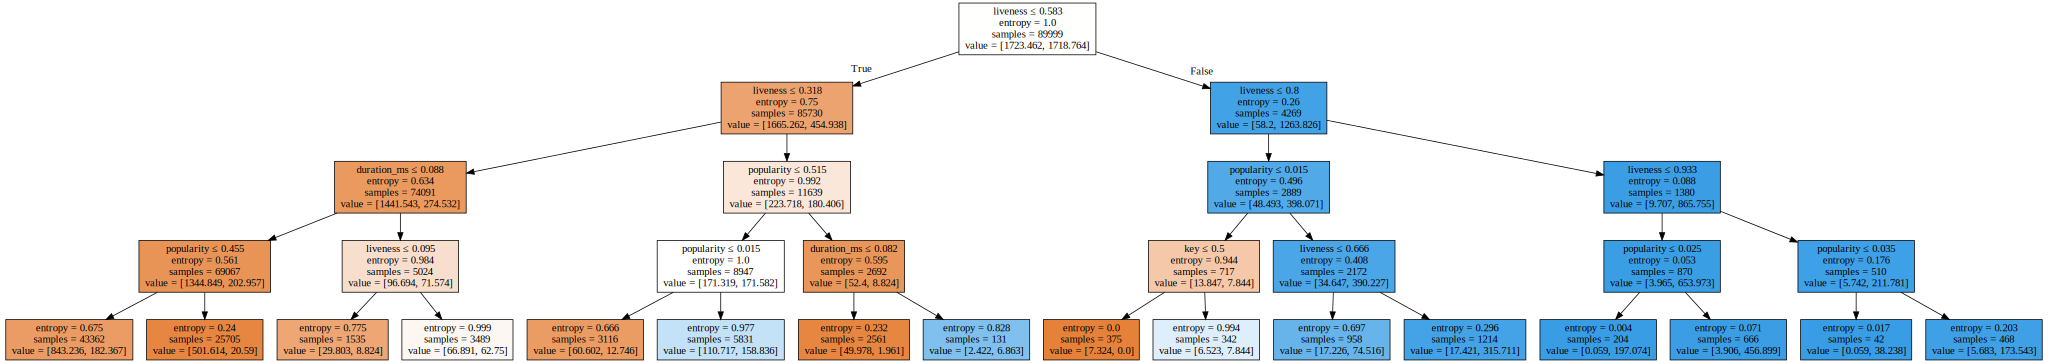

In [27]:
from sklearn.tree import export_graphviz
import graphviz

features = [ 'duration_ms', 'popularity', 
       'tempo', 'key', 'liveness']

g = export_graphviz(clf, out_file=None, feature_names=features,
                    filled=True, special_characters=True)
graph = graphviz.Source(g)
graph
#graph.draw('./file.png')

#### Get additional audio features information from spotify

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = '0a3ea39dc26c46c3a6e8f59909e51663'   #'Your Client ID'
secret = '3121497eccd749458ac064436a907b74'   # 'Your Secret ID'
my_client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
spotify = spotipy.Spotify(client_credentials_manager=my_client_credentials_manager)

This step below will take a little time, because there is a limitation to connection. I couldn't get all the information in one time, so I seperate them into batches.

In [ ]:
audio_features_data = []

for batch_num in range(0, 100100, 100):
    
    batch_maximum = batch_num+100
    tracks_id = df[batch_num:batch_maximum].id.tolist()
    try : 
        results = spotify.audio_features(tracks=tracks_id)
        print(f'Batch {batch_num} : {batch_maximum} SUCCESSFULLY ACCESS!')
        
    except :
        print(f'Batch {batch_num} : {batch_maximum} not success')
    
    for result in results:
        if result not in audio_features_data :
            audio_features_data.append(result)

In [12]:
# pop out the empty object "None" at the bottom of the list
audio_features_data.pop()

In [13]:
audio_features_df = pd.DataFrame(audio_features_data)

In [14]:
audio_features_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.982,https://api.spotify.com/v1/audio-analysis/4BJq...,0.279,831667,0.211,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,0.0366,80.954,4,https://api.spotify.com/v1/tracks/4BJqT0PrAfrx...,audio_features,spotify:track:4BJqT0PrAfrxzMOxytFOIz,0.0594
1,0.732,https://api.spotify.com/v1/audio-analysis/7xPh...,0.819,180533,0.341,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,0.4150,60.936,4,https://api.spotify.com/v1/tracks/7xPhfUan2yNt...,audio_features,spotify:track:7xPhfUan2yNtyFG0cUWkt8,0.9630
2,0.961,https://api.spotify.com/v1/audio-analysis/1o6I...,0.328,500062,0.166,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,0.0339,110.339,4,https://api.spotify.com/v1/tracks/1o6I8BglA6yl...,audio_features,spotify:track:1o6I8BglA6ylDMrIELygv1,0.0394
3,0.967,https://api.spotify.com/v1/audio-analysis/3ftB...,0.275,210000,0.309,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,0.0354,100.109,3,https://api.spotify.com/v1/tracks/3ftBPsC5vPBK...,audio_features,spotify:track:3ftBPsC5vPBKxYSee08FDH,0.1650
4,0.957,https://api.spotify.com/v1/audio-analysis/4d6H...,0.418,166693,0.193,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,0.0380,101.665,4,https://api.spotify.com/v1/tracks/4d6HGyGT8e12...,audio_features,spotify:track:4d6HGyGT8e121BsdKmw9v6,0.2530


In [17]:
# select the features that are not in the given dataset , exclusive ['duration_ms', 'tempo', 'key', 'liveness']
features = ['acousticness', 'analysis_url', 'danceability', 'energy',
       'id', 'instrumentalness', 'loudness', 'mode',
       'speechiness', 'time_signature', 'track_href', 'type', 'uri',
       'valence']
audio_features_df_n = audio_features_df.loc[:,features]

In [19]:
# join the original given dataset by ID
audio_featured_df = df.join(audio_features_df_n.set_index('id'), on='id')

In [20]:
audio_featured_df.head()

,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness,acousticness,...,energy,instrumentalness,loudness,mode,speechiness,time_signature,track_href,type,uri,valence
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665,0.982,...,0.211,0.878000,-20.096,1,0.0366,4,https://api.spotify.com/v1/tracks/4BJqT0PrAfrx...,audio_features,spotify:track:4BJqT0PrAfrxzMOxytFOIz,0.0594
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160,0.732,...,0.341,0.000000,-12.441,1,0.4150,4,https://api.spotify.com/v1/tracks/7xPhfUan2yNt...,audio_features,spotify:track:7xPhfUan2yNtyFG0cUWkt8,0.9630
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101,0.961,...,0.166,0.913000,-14.850,1,0.0339,4,https://api.spotify.com/v1/tracks/1o6I8BglA6yl...,audio_features,spotify:track:1o6I8BglA6ylDMrIELygv1,0.0394
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381,0.967,...,0.309,0.000028,-9.316,1,0.0354,3,https://api.spotify.com/v1/tracks/3ftBPsC5vPBK...,audio_features,spotify:track:3ftBPsC5vPBKxYSee08FDH,0.1650
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229,0.957,...,0.193,0.000002,-10.096,1,0.0380,4,https://api.spotify.com/v1/tracks/4d6HGyGT8e12...,audio_features,spotify:track:4d6HGyGT8e121BsdKmw9v6,0.2530


In [28]:
# using the saved data
# I have saved the result into csv, so I don't need to run the code every time
file_path = "./../../data/task_audiofeatures.csv"
audio_featured_df = pd.read_csv(file_path, encoding='utf8')

#### Label the track that is actual live by the statement in the song title

In [29]:
audio_featured_df["is_title_contain_live"] = audio_featured_df.name.apply(is_title_contain_live)
threshold = 0.8
audio_featured_df["high_liveness"] = audio_featured_df.liveness.apply(label_high_value_in_liveness, args=(threshold,))
audio_featured_df["incorrect_liveness"] = audio_featured_df.apply(incorrect_liveness, axis = 1)

In [30]:
audio_featured_df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'popularity', 'release_date',
       'tempo', 'key', 'liveness', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'loudness', 'mode',
       'speechiness', 'time_signature', 'track_href', 'type', 'uri', 'valence',
       'open_track_url', 'is_title_contain_live', 'high_liveness',
       'incorrect_liveness'],
      dtype='object')

In [31]:
# keep the needed features (they're all in numeric format)
feature_column = ['duration_ms', 'popularity', 
       'tempo', 'key', 'liveness', 'acousticness', 
       'danceability', 'energy', 'instrumentalness', 'loudness', 'mode',
       'speechiness', 'time_signature',  'valence',
        'is_title_contain_live','high_liveness',
       'incorrect_liveness']

In [32]:
audio_featured_df = audio_featured_df[feature_column]

In [33]:
audio_featured_df.head()

,duration_ms,popularity,tempo,key,liveness,acousticness,danceability,energy,instrumentalness,loudness,mode,speechiness,time_signature,valence,is_title_contain_live,high_liveness,incorrect_liveness
0,831667,4,80.954,10,0.665,0.982,0.279,0.211,0.878000,-20.096,1,0.0366,4,0.0594,0,0,0
1,180533,5,60.936,7,0.160,0.732,0.819,0.341,0.000000,-12.441,1,0.4150,4,0.9630,0,0,0
2,500062,5,110.339,3,0.101,0.961,0.328,0.166,0.913000,-14.850,1,0.0339,4,0.0394,0,0,0
3,210000,3,100.109,5,0.381,0.967,0.275,0.309,0.000028,-9.316,1,0.0354,3,0.1650,0,0,0
4,166693,2,101.665,3,0.229,0.957,0.418,0.193,0.000002,-10.096,1,0.0380,4,0.2530,0,0,0


In [175]:
audio_featured_df.to_csv("./../data/final100k.csv", encoding='utf8')

check on the distribution of each column

array([[<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'is_title_contain_live'}>,
        <AxesSubplot:title={'center':'high_liveness'}>],
       [<AxesSubplot:title={'center':'incorrect_liveness'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

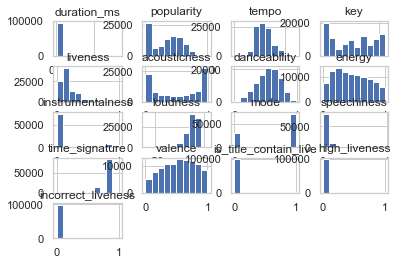

In [34]:
audio_featured_df.hist()

Correlation between features <br/>
As you can see, there is a little relation between **liveness** and **is_title_contain_live**, but the value is low

<AxesSubplot:>

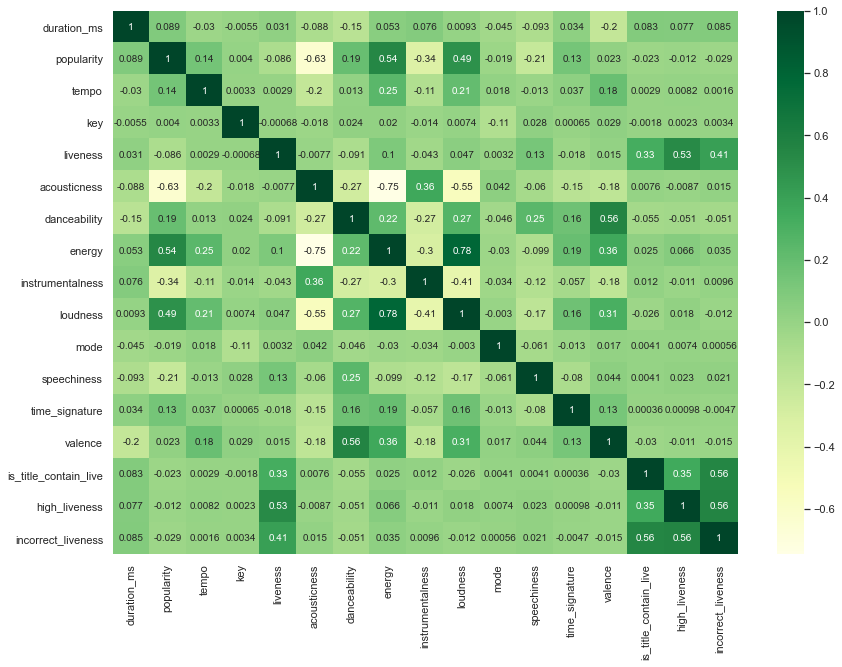

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14, 10))
# annot數值標示
sns.heatmap(audio_featured_df.astype('float').corr(), cmap='YlGn', annot=True)

Check if there's any null value

In [36]:
audio_featured_df.isnull().values.any()

False

In [37]:
# seperate the data in X, Y
y_df = audio_featured_df['incorrect_liveness']
x_df = audio_featured_df.drop(['is_title_contain_live','high_liveness','incorrect_liveness'], axis=1)


In [38]:
# transform the data by StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_df_MM = MinMaxScaler().fit_transform(x_df)

In [39]:
x_df_MM

array([[0.20085756, 0.04      , 0.3324504 , ..., 0.03773196, 0.8       ,
        0.0594    ],
       [0.04262907, 0.05      , 0.25024332, ..., 0.42783505, 0.8       ,
        0.963     ],
       [0.12027605, 0.05      , 0.45312455, ..., 0.03494845, 0.8       ,
        0.0394    ],
       ...,
       [0.07603417, 0.26      , 0.54860435, ..., 0.09896907, 0.8       ,
        0.493     ],
       [0.06863055, 0.32      , 0.56400843, ..., 0.05690722, 0.8       ,
        0.575     ],
       [0.04723643, 0.35      , 0.5093447 , ..., 0.03958763, 0.8       ,
        0.158     ]])

In [40]:
from sklearn.model_selection import train_test_split
# train_test_split -> (x_train 90%, x_test 10%, y_train 90%, y_test 10%)
x_train, x_test, y_train, y_test = train_test_split(x_df_MM, y_df, test_size=0.1)

#### Due to the imbalance in y label (0 : 1463,  1: 98536) , there is a need to give a weight 

In [41]:
label_1_num = audio_featured_df[audio_featured_df.incorrect_liveness ==1].shape[0] 
label_0_num = audio_featured_df[audio_featured_df.incorrect_liveness ==0].shape[0] 
total_num = audio_featured_df.shape[0]

weight_0 = label_1_num/total_num
weight_1 = label_0_num/total_num
print(f'0: {weight_0}  1:{weight_1}')

0: 0.01953019530195302  1:0.980469804698047


#### Model : Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, class_weight={0:weight_0, 1:weight_1})
clf.fit(x_train, y_train)

pre = clf.predict(x_test)
prediction_outcome(y_test, pre)

Probability of accurate prediction 預測成功的機率: 0.9339
precision: 0.60, recall: 0.87


Prediction               
                      correct_live incorrect_live
Actual correct_live           9186            625
       incorrect_live           36            153

In [43]:
features = feature_column
features.pop()
features.pop()
features.pop()
features

['duration_ms',
 'popularity',
 'tempo',
 'key',
 'liveness',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'loudness',
 'mode',
 'speechiness',
 'time_signature',
 'valence']

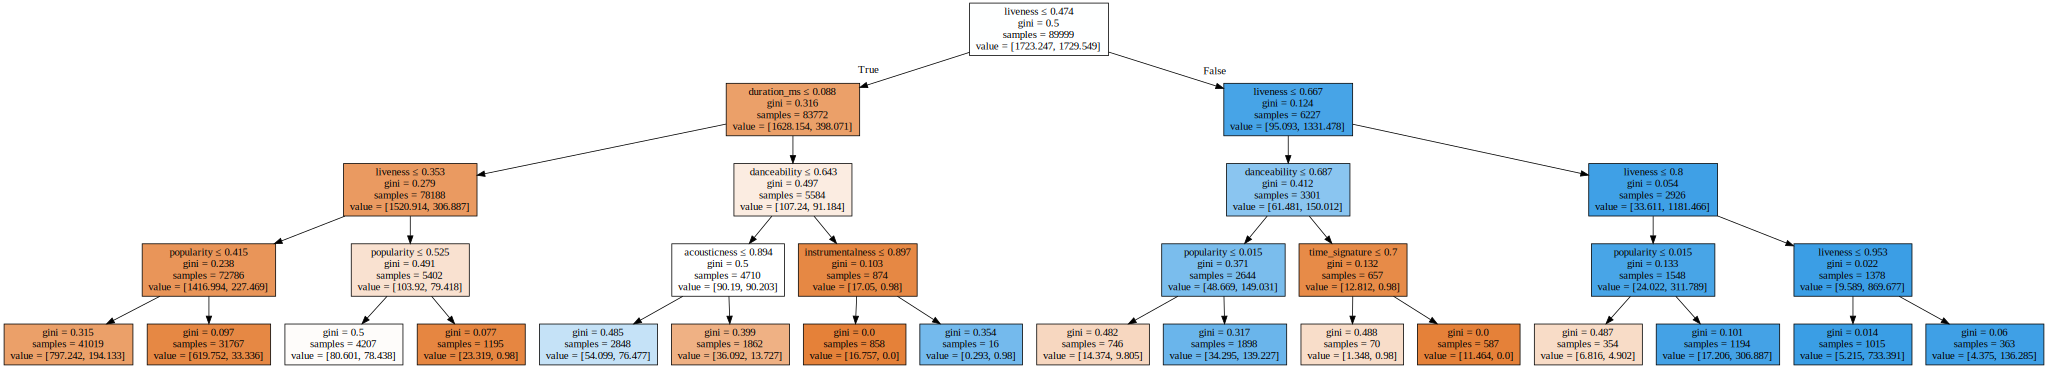

In [44]:
from sklearn.tree import export_graphviz
import graphviz



g = export_graphviz(clf, out_file=None, feature_names=features,
                    filled=True, special_characters=True)
graph = graphviz.Source(g)
graph

try on some else classification model

In [45]:

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

gdbt = GradientBoostingClassifier(subsample=0.75, n_estimators=250, max_features=14,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True, class_weight={0:weight_0, 1:weight_1})

#### Model :  Random forest

In [46]:
# 隨機森林預測檔
rf.fit(x_train, y_train)
pre = rf.predict(x_test)
prediction_outcome(y_test, pre)

Probability of accurate prediction 預測成功的機率: 0.9486
precision: 0.62, recall: 0.88


Prediction               
                      correct_live incorrect_live
Actual correct_live           9333            478
       incorrect_live           36            153

#### Model :  GradientBoosting

In [47]:
# 梯度提升機預測檔 
gdbt.fit(x_train, y_train)
pre = gdbt.predict(x_test)
prediction_outcome(y_test, pre)

Probability of accurate prediction 預測成功的機率: 0.9875
precision: 0.85, recall: 0.78


Prediction               
                      correct_live incorrect_live
Actual correct_live           9768             43
       incorrect_live           82            107

### save the model weight

In [ ]:
from joblib import dump, load
# for example, using the model of decisio tree
dump(clf, './gnb.joblib') 

### load the model weight

In [ ]:
from joblib import dump, load
clf = load('./clf.joblib') 